In [1]:
from classy import Class

import os
import copy
import yaml
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

from matplotlib import rc
from scipy.interpolate import interp1d

rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
#matplotlib.rc('font', **font)
matplotlib.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

## warmup
run a fiducial cosmology 

In [2]:
LCDM =  Class()
baseline = {'omega_b':0.0223828,
            'omega_cdm':0.3,
            'h':0.67810,'A_s':2.100549e-09,
            'n_s':0.9660499,
            'tau_reio':0.05430842, 
            'lensing':'yes',
            'background_verbose': 10,
            'output': 'tCl,pCl,lCl',
            'input_verbose': 10,
            'output_verbose': 10,
            'background_verbose':1
            }
LCDM.set(baseline)

True

Try ADE now

In [14]:
# pheno_axion should work
# pheno_axion_p is a different parametrisation implemented by myself 
# and has no particular reason to work
# for i am a failure 

axion_zc = 10**3.677 
w_n = 0.76
n = (1+w_n)/(1-w_n)
axion_ac = 1/(axion_zc + 1)

ADE_common_dict={
    'fluid_equation_of_state': 'EDE',
    'ede_parametrization':'pheno_axion',
    'fraction_fld_ac': 0.09,
    'w_fld_f': w_n,
    'a_c': axion_ac,
    'Theta_initial_fld': 0.1,
}

models = {'ADE1': Class(), 'ADE2': Class()}

for name, model in models.items():
    model.set(baseline)
    model.set(ADE_common_dict)

ADE1 = models['ADE1']
ADE2 = models['ADE2']
ADE1.set({'nu_fld': 1})
ADE2.set({'nu_fld': 0.5})


#ADE1.set({'ede_parametrization': 'pheno_axion_p',})
#ADE2.set({'ede_parametrization': 'pheno_axion',})

True

In [15]:
#LCDM.compute()
ADE1.compute()
ADE2.compute()

#ADE1.get_background()
#ADE2.get_background()

Reading input parameters
Reading input parameters
Reading in EDE pheno_axion / ADE parameters: 
Read in a_c = 2.103336e-04
Value input for nu_fld = 1.000000
Assuming default n > 500.000000 makes n = infinity
Read in w_fld_f = 7.600000e-01 
	and set n_pheno_axion = 7.333333e+00
 -> matched budget equations by adjusting Omega_Lambda = 0.298802
Running CLASS version v3.3.0
Computing background
pba->Omega0_fld 9.267351e-10  exp(integral_fld) 2.600413e+19
pba->Omega0_ur 3.717995e-05  exp(integral_fld) 0.000000e+00
 -> age = 10.788700 Gyr
 -> conformal age = 10159.322779 Mpc
 -> H0 = 67.810000 km/s/Mpc
 -> N_eff = 3.044 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 7706.738479
    corresponding to conformal time = 49.647100 Mpc
Reading input parameters
Reading input parameters
Reading in EDE pheno_axion / ADE parameters: 
Read in a_c = 2.103336e-04
Value input for nu_fld = 0.500000
Assuming default n > 500.000000 makes n = infinity
R

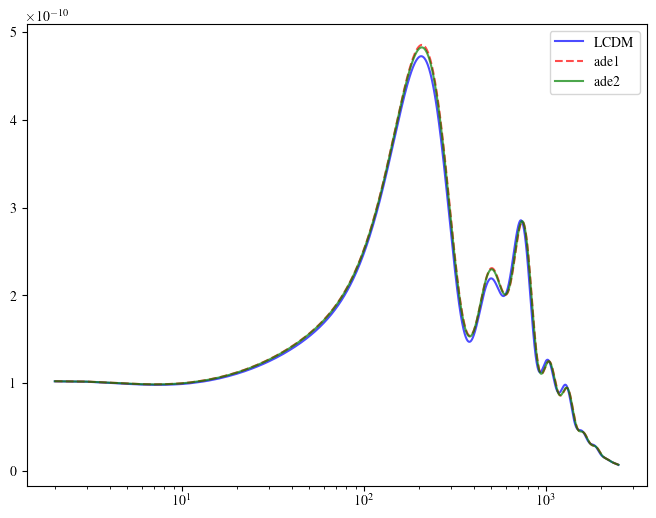

In [16]:
cls_l = LCDM.lensed_cl(2500)
cls1 = ADE1.lensed_cl(2500)
cls2 = ADE2.lensed_cl(2500)
cls_all = [cls_l, cls1, cls2]
colors = ['blue', 'red', 'green']
labels = ['LCDM', 'ade1', 'ade2']
for i in range(3):
    cls = cls_all[i]
    ll = cls['ell'][2:]
    clTT = cls['tt'][2:]
    clEE = cls['ee'][2:]
    clPP = cls['pp'][2:]
    pi = np.pi
    plt.plot(ll,clTT*ll*(ll+1)/2./pi, color=colors[i], linestyle='dashed' if i==1 else 'solid',alpha=0.7, label = labels[i])
    plt.xscale('log')
plt.legend()


In [17]:
bg = ADE1.get_background()
bg_no_p = ADE2.get_background()
print(bg.keys())

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_fld', '(.)Omega_fld', '(.)w_fld', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])


In [22]:
z_fld_ADE1 = bg['(.)w_fld']
z_fld_ADE2 = bg_no_p['(.)w_fld']
plt.plot(bg['z'],z_fld_ADE1, label='z_fld ADE1', color='blue',alpha=0.5)
plt.plot(bg['z'],z_fld_ADE2, label='z_fld ADE2', color='red', linestyle='dashed')
plt.axvline(x=axion_zc, color='purple', linestyle='dotted', label='z_c')
plt.axhline(y=-1, linestyle='dotted', label=r'$w_\Lambda$')
plt.axhline(y=1/3, linestyle='dotted', label=r'$w_r$')

plt.xlim(0, 2*axion_zc)

plt.legend()
#plt.yscale('log')
#plt.xscale('log')